In [1]:
import random
from typing import Dict, List, TypedDict
from langgraph.graph import StateGraph, START, END

In [3]:
class AgentState(TypedDict):
    """State of the agent."""
    name: str
    number: List[int]
    counter: int

In [5]:
def greeting_node(state: AgentState) -> AgentState:
    """Greeting node. which say hi to the user."""
    state["name"] = f"Hi there, {state['name']}!"
    state["counter"] = 0
    return state

def random_node(state: AgentState) -> AgentState:
    """Generate a random number from 0 to 10."""
    state["number"].append(random.randint(0, 10))
    state["counter"] += 1
    return state

def should_continue(state: AgentState) -> AgentState:
    """Function to decide what to do next."""
    if state["counter"] < 5:
        print("ENTERING LOOP", state["counter"])
        return "loop"
    else:
        return "exit"

In [6]:
# START -> greeting -> random -> random -> random -> random -> random -> END


In [8]:
graph = StateGraph(AgentState)

graph.add_node("greeting", greeting_node)
graph.add_node("random", random_node)
graph.add_edge("greeting", "random")

graph.add_conditional_edges(
    "random",             # Source node
    should_continue,      # Action
    {
        "loop": "random", # Self-looping edge
        "exit": END,      # Exit edge
    }
)

graph.add_edge(START, "greeting")

app = graph.compile()

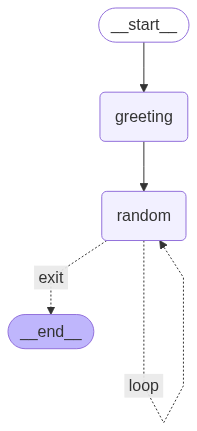

In [9]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [10]:
app.invoke({"name": "Chen Zixuan", "number": [], "counter": -1})

ENTERING LOOP 1
ENTERING LOOP 2
ENTERING LOOP 3
ENTERING LOOP 4


{'name': 'Hi there, Chen Zixuan!', 'number': [8, 6, 2, 7, 10], 'counter': 5}